## <b>예측 결과 평가하기</b> 
성능 측정과 해석(1): Accuracy, Precision, Recall

* 정확도(Accuracy)
예측 결과와 실제값이 동일한 건수 / 전체 데이터 수

* 정밀도(Precision) 실제로 Positive인 데이터를 모델이 Positive라고 분류한 데이터의 비율
TP / (FP + TP)

* 재현율(Recall)
실제값이 Positive인 대상중에 예측값과 실제값이 Positive로 일치한 데이터의 비율
TP / (FN + TP)
민감도(Sensitivity) 또는 TPR(True Positive Rate)라고도 불린다
* scikit learn에서 accuracy_score, precision_score, recall_score 등을 통하여 구할 수 있다

### 성능 측정과 해석(2): F1, Confusion Matrix, AUC


- **F1**
    - Precision과 Recall의 조화평균
- **Confusion Matrix**
    - 오차행렬
- **AUC** (Area Under ROC Curve)
    - 종합적 판단지표
- scikit learn에서 `confusion_matrix`, `f1_score` 등을 통하여 구할 수 있다

### 알고리즘 성과 비교

- <a href="https://www.medric.or.kr/Controls/Sub.aspx?d=03&s=02&s2=01&g=TENDENCY&c&m=VIEW&i=3455">COVID-19 세가지 진단검사 비교 : 비인두도말 PCR, 타액 PCR, 신속항원검사</a> (출처: 국가지정 의과학연구정보센터)

- <a target="_blank" href="http://medicalworldnews.co.kr/m/view.php?idx=1510947740">코로나19 자가검사키트 정확도…민감도·특이도와 양성예측도란?</a>


- <a href = "https://blog.naver.com/kfdazzang/222640236513"> 민감도 90%로 허가받은 자가검사키트, 검사 현장에서 양성예측도가 76%인 이유는?</a>

### 머신러닝 결과의 시각화(1)

In [ ]:
### 구축한 머신러닝 모델과 데이터 불러오기

모델 및 데이터 설명

- `logreg` : Logistic Regression Classifier

- `rfc`    : Random Forest Classifier

- `gbc`    : Gradient Boosting Classifier

- `lgbm`   : LightGBM Classifier

In [ ]:
### 로지스틱 모델 회귀계수 해석하기

In [ ]:
# X_test 의 컬럼명 확인하기

X_test.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country'],
      dtype='object')

In [ ]:
# Logistic Regression 이진분류 모델의 회귀계수 확인하기

logreg.coef_

array([[ 0.45435118, -0.08929983,  0.88011855, -0.37428934, -0.01347698,
        -0.19718355,  0.08082303,  0.43380857,  2.34127172,  0.27435968,
         0.37244795,  0.01498249]])

In [ ]:
# y = a + 0.45435118*age + (-0.08929983)*workclass.dummy + ... + 0.01498249 * native.country.dummy

In [ ]:
# 데이터 형태 바꾸기

coef = sum(logreg.coef_)
coef

array([ 0.45435118, -0.08929983,  0.88011855, -0.37428934, -0.01347698,
       -0.19718355,  0.08082303,  0.43380857,  2.34127172,  0.27435968,
        0.37244795,  0.01498249])

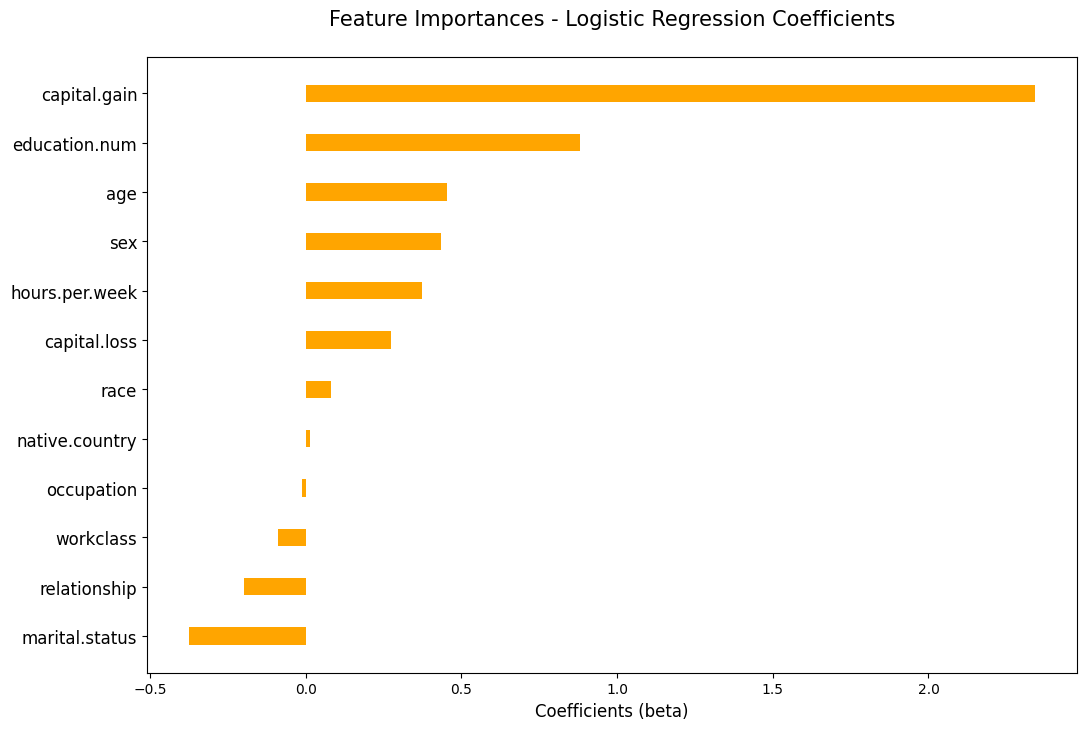

In [ ]:
# Logistic Regression 이진분류 모델의 회귀계수 시각화 하기

indices =  np.argsort(coef)  # 회귀계수 크기 순으로 정렬

plt.figure(figsize=(12, 8))
plt.barh(X_test.columns, coef[indices], .35, color='orange', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)
plt.xlabel('Coefficients (beta)', fontsize=12)
plt.title('Feature Importances - Logistic Regression Coefficients\n', fontsize=15)
plt.show()

### 머신러닝 결과의 시각화(2)

In [ ]:
### Random Forest 이진분류 피처 중요도 분석하기

In [ ]:
# Random Forest 이진분류 모델의 피처 중요도 확인하기 # MDI

importances =  rfc.feature_importances_
importances 

array([0.20912143, 0.04871247, 0.14148977, 0.06690898, 0.08518582,
       0.11585685, 0.01852693, 0.01261543, 0.12933388, 0.04012147,
       0.11318493, 0.01894206])

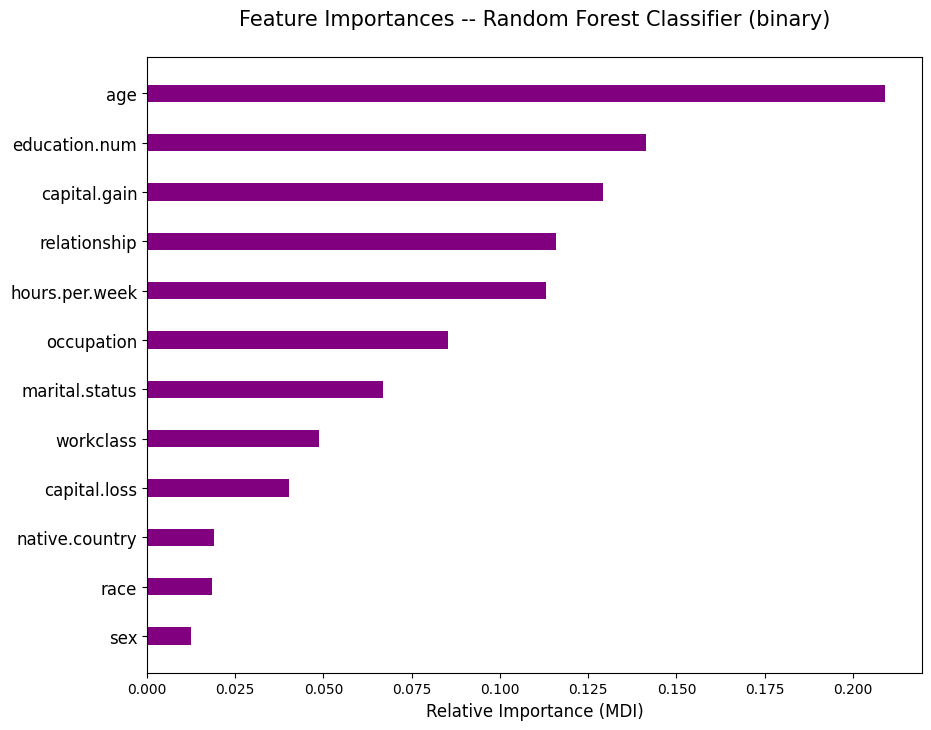

In [ ]:
# Random Forest 이진분류 모델의 피처 중요도 시각화 하기

indices = np.argsort(importances)     # 중요도 크기 순으로 정렬

plt.figure(figsize=(10, 8))

plt.barh(X_test.columns, importances[indices], .35, color='purple', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)

plt.xlabel('Relative Importance (MDI)', fontsize=12)
plt.title('Feature Importances -- Random Forest Classifier (binary)\n', fontsize=15)
plt.show()

In [ ]:
 ### Gradient Boosting 이진분류 피처 중요도 분석하기

In [ ]:
# Gradient Boosting 이진분류 모델의 피처 중요도 확인하기

importances =  gbc.feature_importances_
importances  ###

array([5.87837092e-02, 5.51372125e-03, 2.10092686e-01, 4.33635936e-02,
       1.92692089e-02, 3.34389426e-01, 3.03009270e-04, 4.93262744e-03,
       2.22548066e-01, 6.02590869e-02, 3.97442162e-02, 8.00649340e-04])

In [ ]:
### LightGBM 이진분류 피처 중요도 분석하기

In [ ]:
# LightGBM 이진분류 모델의 피처 중요도 확인하기 ## 피처별 분기한 회수

importances =  lgbm.feature_importances_
importances ###

array([611, 174, 332, 162, 329, 150,  63,  50, 378, 264, 398,  89],
      dtype=int32)

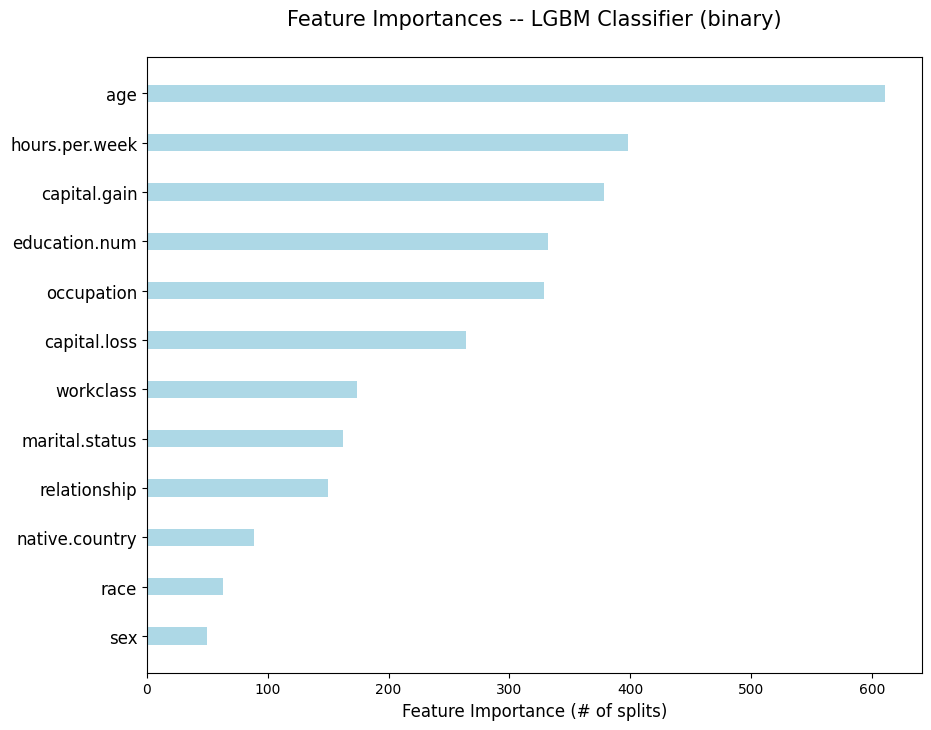

In [ ]:
# LightGBM 이진분류 모델의 피처 중요도 시각화 하기

indices = np.argsort(importances)   # 중요도 크기 순으로 정렬

plt.figure(figsize=(10, 8))

plt.barh(X_test.columns, importances[indices], .35, color='lightblue', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)

plt.xlabel('Feature Importance (# of splits)', fontsize=12)
plt.title('Feature Importances -- LGBM Classifier (binary)\n', fontsize=15)
plt.show()

In [ ]:
### 요약: 소득 예측 이진분류 모델 피처 중요도 비교

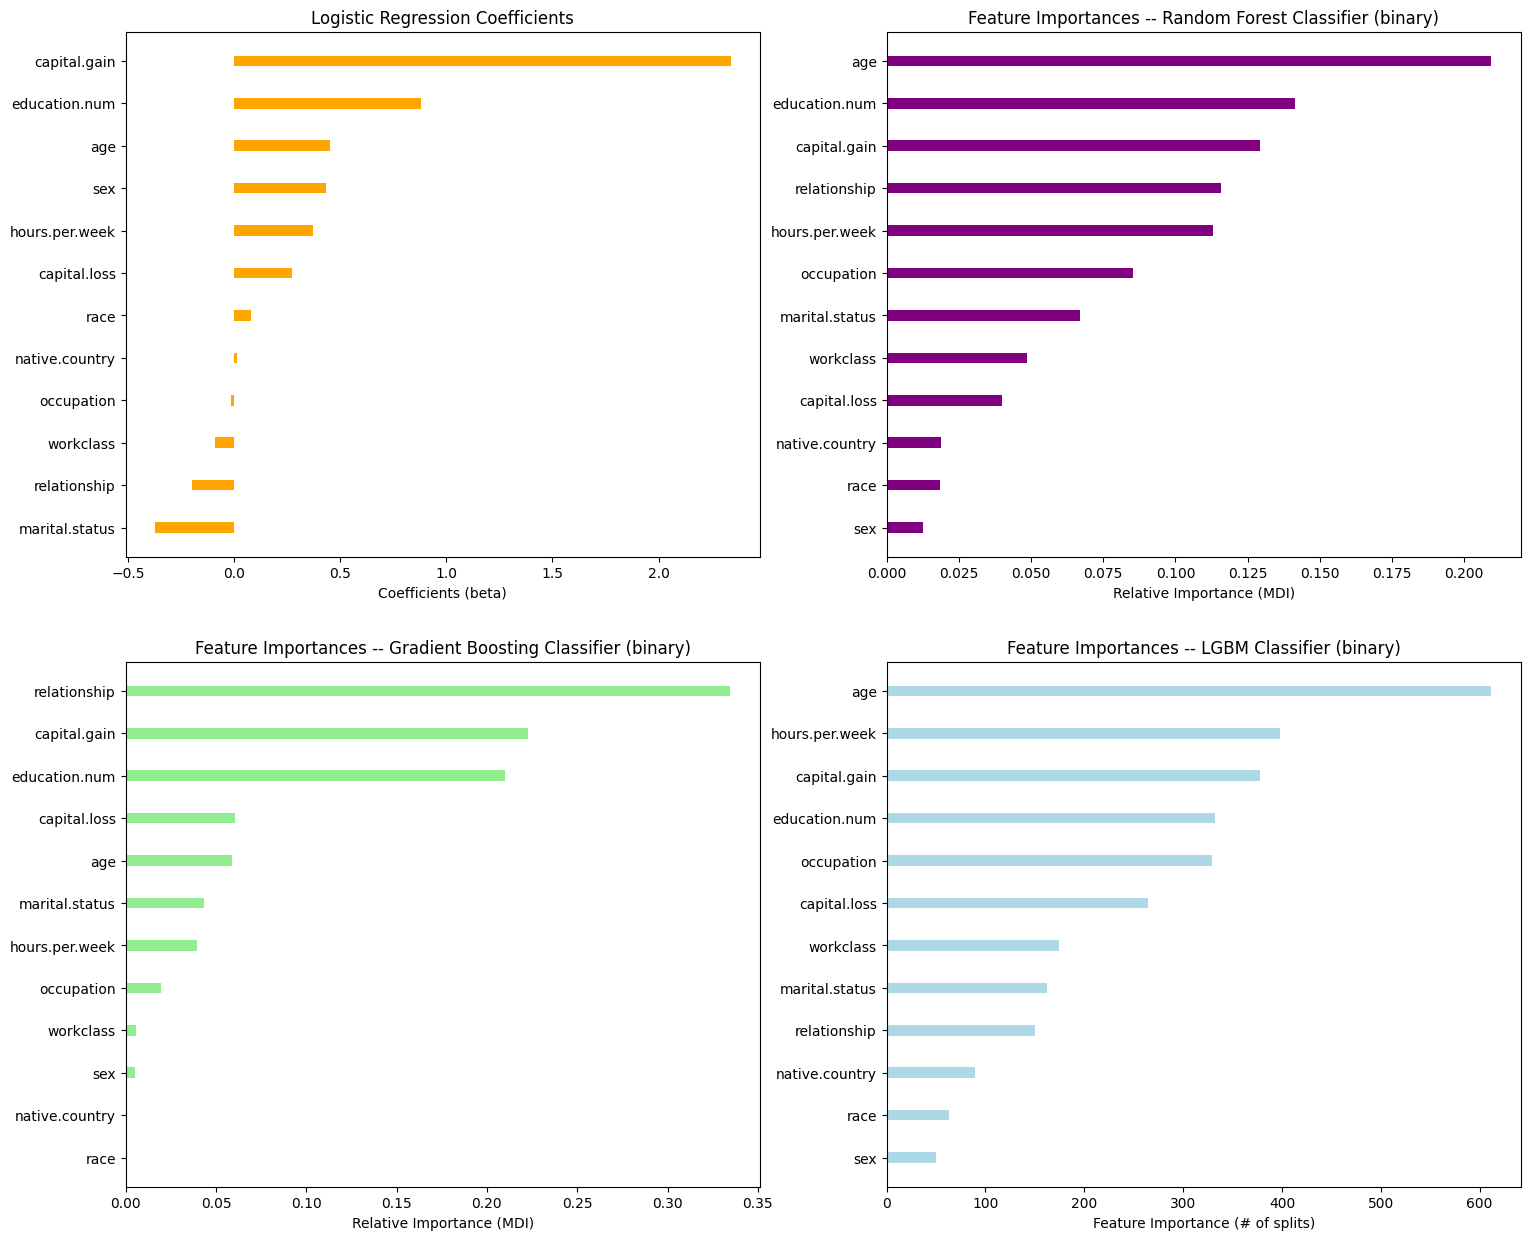

In [ ]:
# subplot을 이용하여 4개 이진분류 모델(logreg, gbc, rfc, lgbm)의 회귀계수 및 피처 중요도 시각화 비교하기

plt.figure(figsize=(18, 15))

plt.subplot(2, 2, 1) 
indices_logreg = np.argsort(coef)   ###

plt.title('Logistic Regression Coefficients')
plt.barh(X_test.columns, coef[indices_logreg], .25, color='orange')
plt.yticks(X_test.columns, X_test.columns[indices_logreg])
plt.xlabel('Coefficients (beta)')

plt.subplot(2, 2, 2)
importances_rfc = rfc.feature_importances_  ###
indices_rfc = np.argsort(importances_rfc)  ###

plt.title('Feature Importances -- Random Forest Classifier (binary)')
plt.barh(X_test.columns, importances_rfc[indices_rfc], .25, color='purple')
plt.yticks(X_test.columns, X_test.columns[indices_rfc])
plt.xlabel('Relative Importance (MDI)')

plt.subplot(2, 2, 3)
importances_gbc = gbc.feature_importances_  ###
indices_gbc =  np.argsort(importances_gbc)  ###

plt.title('Feature Importances -- Gradient Boosting Classifier (binary)')
plt.barh(X_test.columns, importances_gbc[indices_gbc], .25, color='lightgreen')
plt.yticks(X_test.columns, X_test.columns[indices_gbc])
plt.xlabel('Relative Importance (MDI)')

plt.subplot(2, 2, 4)
importances_lgbm = lgbm.feature_importances_  ###
indices_lgbm = np.argsort(importances_lgbm)  ###

plt.title('Feature Importances -- LGBM Classifier (binary)')
plt.barh(X_test.columns, importances_lgbm[indices_lgbm], .25, color='lightblue')
plt.yticks(X_test.columns, X_test.columns[indices_lgbm])
plt.xlabel('Feature Importance (# of splits)')

plt.show()

In [ ]:
# 다양한 모델을 써서 다양한 결과를 본다.

### (참고) 머신러닝 모델에서 변수의 영향력을 계산하는 방법

- 1) <b>회귀 모델의 회귀계수(Coefficients) </b>
    - X(피처)의 변량에 따라 y(타겟)의 변량이 어느 정도로 변하는지 수치화한 값
    - 변수 영향력의 방향(긍정, 부정)을 알 수 있다는 장점
    - 단점: 변수 스케일의 영향을 받기 때문에 스케일링 작업이 중요
    - scikit-learn의 `coef_` 메서드 사용


- 2) <b>트리 기반 모델의 MDI(Mean Decrease Impurity) 기반 중요도 </b>
    - 해당 피처가 모델에 적용될 때 전체적으로 분류 결과의 불순도(impurity)를 얼마나 감소시키는지를 측정
    - 불순도(impurity)의 측정 방법은 주로 entropy 혹은 Gini impurity로 계산
    - 피처가 모델이 분류를 잘 하는데 중요하게 작용할 수록 값이 커지게 됨
    - scikit-learn의 `feature_importances_` 메서드 사용


- 3) <b>치환(Permutation) 기반 중요도 </b>
    - 특정 피처의 값을 임의의 값으로 치환했을 떄 원래 데이터보다 예측 에러가 얼마나 더 커지는가를 측정
    - 장점: 해석이 직관적이며, 계산에 시간이 오래 걸리지 않음
    - 단점: 변수간 상호의존성 때문에 특정 피처의 영향력을 과대 혹은 과소추정할 수 있음
    - scikit-learn의 `permutation_importance` 메서드 사용
    - eli5의 `PermutationImportance` 메서드 사용


- 4) <b>LGBM 모델의 분기 기반 중요도</b>
    - 기본값으로는 각 피처에서 결정을 내리기까지 분기(split)한 횟수를 나타냄
    - 파라미터 설정을 바꾸면 분기에서 얻어낸 정보 이득(gain)의 총합을 나타낼 수 있음
    - scikit-learn의 `feature_importances_` 메서드 사용
    - light gbm의 `plot_importance` 메서드 사용


- 5) <b>XAI 커뮤니티에서 제안하는 게임이론 기반 Shapely 값</b>
    - 치환 피처 중요도(Permutation Importance)와 비슷하게 임의의 값으로 치환했을 때의 pay-off를 측정
    - 장점: 변수간 상호의존성에 영향을 받지 않으며, 계산시마다 값이 달라지지 않음, 변수 영향력의 방향(긍정, 부정)을 알 수 있음
    - 단점: 학습결과가 아니라 원 데이터에서 결정되기 때문에 아웃라이어에 약할 수 있음, 계산이 오래 걸림
    - shap의 `shap_values` 메서드 사용

각 방법론은 장단점이 뚜렷하고 계산방식이 다르므로 머신러닝 모델 해석시 상황에 맞게 적용하는 것이 중요